# **PROJETO - CLUSTERIZAÇÃO DE DADOS SOCIAIS AO REDOR DO GLOBO**

FONTE: https://databank.worldbank.org/source/world-development-indicators#


## **CONECTAR COM O GOOGLE DRIVE PARA CAPTAR OS BANCOS DE DADOS**

In [102]:
# conecta o colab ao google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **IMPORTS DE BIBLIOTECAS**

###BIBLIOTECA DE ANÁLISE DE TEMPO DE EXECUÇÃO DO SCRIPT

In [103]:
# Cronometra o tempo de execução do programa

import time
start_script = time.time()

###BIBLIOTECAS RESTANTES

In [104]:
# Importa as bibliotecas necessárias

from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import normaltest
from scipy.stats import t
from scipy import stats
from IPython.display import clear_output 
import pdb


##**FUNÇÕES**

In [105]:
def ler_csv(name_csv):
  df = pd.read_csv(bd_local + '/' + name_csv, header=0, sep = ',', skiprows=0, decimal='.')
  return df

In [106]:
def formatar_titulo(text):
  words = text.split(" ")
  total_string = ""
  for counter, word in enumerate(words):
    if counter>0 and counter % 5 == 0:
      total_string +="\n{}".format(word)
    else:
      total_string +=" {}".format(word)
  return total_string.lstrip()

In [107]:
def normalize(df):
  result = df.copy()
  for feature_name in df.columns:
    if feature_name == 'País':
      pass
    else:
      max_value = df[feature_name].max()
      min_value = df[feature_name].min()
      result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
  return result

##**CAPTAÇÃO DE DADOS**

In [108]:
bd_geral = '/content/drive/MyDrive/..Python_Codes/Projeto_Statistic_Analysis_03/'
bd_local = bd_geral + 'BD'
df = ler_csv('e9fc2d47-7cea-4268-b8d7-28b03fa17709_Data.csv')
# df#.head()

## **TRATAMENTO DE DADOS**

In [109]:
df.drop('Country Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Series Code',  axis='columns', inplace=True)    # remove colunas desnecessárias

# Remove linhas sem utilidade:
df.replace('..', np.nan, inplace=True)
df.replace('World', np.nan, inplace=True)
df.replace('Upper middle income', np.nan, inplace=True)
df.replace('Lower middle income', np.nan, inplace=True)
df.replace('Low income', np.nan, inplace=True)
df.replace('Low & middle income', np.nan, inplace=True)
df.replace('Lower middle income', np.nan, inplace=True)
df.replace('Post-demographic dividend', np.nan, inplace=True)
df.replace('Pre-demographic dividend', np.nan, inplace=True)
df.replace('Other small states', np.nan, inplace=True)
df.replace('OECD members', np.nan, inplace=True)
df.replace('Not classified', np.nan, inplace=True)
df.replace('North America', np.nan, inplace=True)
df.replace('Middle East & North Africa (excluding high income)', np.nan, inplace=True)
df.replace('Middle East & North Africa', np.nan, inplace=True)
df.replace('Least developed countries: UN classification', np.nan, inplace=True)
df.replace('Latin America & the Caribbean (IDA & IBRD countries)', np.nan, inplace=True)
df.replace('Latin America & Caribbean (excluding high income)', np.nan, inplace=True)
df.replace('Late-demographic dividend', np.nan, inplace=True)
df.replace('IDA total', np.nan, inplace=True)
df.replace('IDA only', np.nan, inplace=True)
df.replace('IDA blend', np.nan, inplace=True)
df.replace('IDA & IBRD total', np.nan, inplace=True)
df.replace('IBRD only', np.nan, inplace=True)
df.replace('High income', np.nan, inplace=True)
df.replace('Heavily indebted poor countries (HIPC)', np.nan, inplace=True)
df.replace('Fragile and conflict affected situations', np.nan, inplace=True)
df.replace('Europe & Central Asia', np.nan, inplace=True)
df.replace('Euro area', np.nan, inplace=True)
df.replace('East Asia & Pacific (IDA & IBRD countries)', np.nan, inplace=True)
df.replace('East Asia & Pacific (excluding high income)', np.nan, inplace=True)
df.replace('East Asia & Pacific', np.nan, inplace=True)
df.replace('Early-demographic dividend', np.nan, inplace=True)
df.replace('Central Europe and the Baltics', np.nan, inplace=True)
df.replace('Data from database: World Development Indicators', np.nan, inplace=True)
df.replace('Last Updated: 06/30/2022', np.nan, inplace=True)

# df.replace(0, np.nan, inplace=True)

# Remove NaN:
df = df[df['Country Name'].notna()]

In [110]:
for n in df.columns:
  c = df[n].count()
  if c > 8:
    pass
  else:
    df.drop(n,  axis='columns', inplace=True)    # remove coluna com menos de 8 dados


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
df

,Country Name,Series Name,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.8,23,24.8,26.1,27.4,28.6,29.7,30.9,31.9,33.2
1,Afghanistan,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.2220191955566,69.0999984741211,68.2906494140625,89.5,71.5,97.6999969482422,97.6999969482422,96.6161346435547,97.6999969482422,97.6999969482422
2,Afghanistan,Adjusted net national income per capita (const...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,516.946743414225,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Adolescents out of school (% of lower secondar...,NaN,NaN,NaN,NaN,80.2730865478516,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,"Children out of school, primary",NaN,NaN,NaN,NaN,1445969,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Sub-Saharan Africa (IDA & IBRD countries),Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.66713932412,13.092997764376,13.5245921485679,13.9890295687858,14.4882753235585,15.1130418757442,15.7194167455806,16.3515486719673,17.0928650231738,17.7383392485754
1316,Sub-Saharan Africa (IDA & IBRD countries),Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.8762582756268,36.8161552261,37.9479417155027,38.2934627763418,39.0737470627612,43.7512869889935,43.7316298787366,46.3706722370329,47.1047724048359,48.3510787862696
1317,Sub-Saharan Africa (IDA & IBRD countries),Adjusted net national income per capita (const...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1244.69190189998,1306.28946745253,1322.55883500886,1365.72385794127,1382.6773885296,1394.19395892346,1354.92183419771,1375.73135890267,1381.69334630816,1329.70963978921
1318,Sub-Saharan Africa (IDA & IBRD countries),Adolescents out of school (% of lower secondar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5915908813477,37.1738815307617,37.901180267334,38.711109161377,38.3366317749023,37.4835815429688,36.6587295532227,35.8764305114746,36.4036293029785,36.5981101989746


In [112]:
# contagem de amostras por ano:
for n in df.columns:
  print(n+': '+ str(len(df[df[n].notna()])))

Country Name: 1170
Series Name: 1170
1970 [YR1970]: 66
1971 [YR1971]: 135
1972 [YR1972]: 142
1973 [YR1973]: 139
1974 [YR1974]: 138
1975 [YR1975]: 135
1976 [YR1976]: 150
1977 [YR1977]: 160
1978 [YR1978]: 163
1979 [YR1979]: 162
1980 [YR1980]: 161
1981 [YR1981]: 174
1982 [YR1982]: 169
1983 [YR1983]: 174
1984 [YR1984]: 178
1985 [YR1985]: 179
1986 [YR1986]: 185
1987 [YR1987]: 175
1988 [YR1988]: 173
1989 [YR1989]: 174
1990 [YR1990]: 284
1991 [YR1991]: 295
1992 [YR1992]: 322
1993 [YR1993]: 337
1994 [YR1994]: 367
1995 [YR1995]: 377
1996 [YR1996]: 392
1997 [YR1997]: 387
1998 [YR1998]: 421
1999 [YR1999]: 538
2000 [YR2000]: 792
2001 [YR2001]: 795
2002 [YR2002]: 809
2003 [YR2003]: 798
2004 [YR2004]: 805
2005 [YR2005]: 824
2006 [YR2006]: 811
2007 [YR2007]: 828
2008 [YR2008]: 824
2009 [YR2009]: 838
2010 [YR2010]: 837
2011 [YR2011]: 856
2012 [YR2012]: 869
2013 [YR2013]: 863
2014 [YR2014]: 872
2015 [YR2015]: 911
2016 [YR2016]: 867
2017 [YR2017]: 868
2018 [YR2018]: 858
2019 [YR2019]: 841
2020 [YR2020]:

In [113]:
# Como 2015 tinha mais amostras, foi encolhido para análise:
df_2015 = pd.DataFrame({'País': df['Country Name'],
                        'Indicador': df['Series Name'],
                        'Valor': df['2015 [YR2015]']})
df_2015

,País,Indicador,Valor
0,Afghanistan,Access to clean fuels and technologies for coo...,27.4
1,Afghanistan,Access to electricity (% of population),71.5
2,Afghanistan,Adjusted net national income per capita (const...,516.946743414225
3,Afghanistan,Adolescents out of school (% of lower secondar...,NaN
4,Afghanistan,"Children out of school, primary",NaN
...,...,...,...
1315,Sub-Saharan Africa (IDA & IBRD countries),Access to clean fuels and technologies for coo...,14.4882753235585
1316,Sub-Saharan Africa (IDA & IBRD countries),Access to electricity (% of population),39.0737470627612
1317,Sub-Saharan Africa (IDA & IBRD countries),Adjusted net national income per capita (const...,1382.6773885296
1318,Sub-Saharan Africa (IDA & IBRD countries),Adolescents out of school (% of lower secondar...,38.3366317749023


In [114]:
# rearranjando dados (indicador 1)
df_2015_indic1 = df_2015.copy()  # copia o dataframe mãe
df_2015_indic1.replace('Access to electricity (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN 
df_2015_indic1.replace('Adjusted net national income per capita (constant 2015 US$)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic1.replace('Adolescents out of school (% of lower secondary school age)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic1.replace('Children out of school, primary', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN

df_2015_indic1 = df_2015_indic1[df_2015_indic1['Indicador'].notna()] # remove NaN na coluna "indicador"

df_2015_indic1.drop('Indicador',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2015_indic1.rename(columns = {'Valor':'Access to clean fuels and technologies for cooking (% of population)'}, inplace = True) # renomeia a coluna valor pelo nome especifico do indicador

# lista_2015_indic1 = list(df_2015_indic1['Valor'])  # gera lista somente com valores do indicador 1
                  
###############################################################################################################################################################
# rearranjando dados (indicador 2)
df_2015_indic2 = df_2015.copy()  # copia o dataframe mãe
df_2015_indic2.replace('Access to clean fuels and technologies for cooking (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN 
df_2015_indic2.replace('Adjusted net national income per capita (constant 2015 US$)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic2.replace('Adolescents out of school (% of lower secondary school age)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic2.replace('Children out of school, primary', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN

df_2015_indic2 = df_2015_indic2[df_2015_indic2['Indicador'].notna()] # remove NaN na coluna "indicador"

df_2015_indic2.drop('Indicador',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2015_indic2.rename(columns = {'Valor':'Access to electricity (% of population)'}, inplace = True) # renomeia a coluna valor pelo nome especifico do indicador

# lista_2015_indic2 = list(df_2015_indic2['Valor'])  # gera lista somente com valores do indicador 2
                  
###############################################################################################################################################################
# rearranjando dados (indicador 3)
df_2015_indic3 = df_2015.copy()  # copia o dataframe mãe
df_2015_indic3.replace('Access to clean fuels and technologies for cooking (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN 
df_2015_indic3.replace('Access to electricity (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic3.replace('Adolescents out of school (% of lower secondary school age)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic3.replace('Children out of school, primary', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN

df_2015_indic3 = df_2015_indic3[df_2015_indic3['Indicador'].notna()] # remove NaN na coluna "indicador"

df_2015_indic3.drop('Indicador',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2015_indic3.rename(columns = {'Valor':'Adjusted net national income per capita (constant 2015 US$)'}, inplace = True) # renomeia a coluna valor pelo nome especifico do indicador

# lista_2015_indic3 = list(df_2015_indic3['Valor'])  # gera lista somente com valores do indicador 3
                  
###############################################################################################################################################################
# rearranjando dados (indicador 4)
df_2015_indic4 = df_2015.copy()  # copia o dataframe mãe
df_2015_indic4.replace('Access to clean fuels and technologies for cooking (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN 
df_2015_indic4.replace('Access to electricity (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic4.replace('Adjusted net national income per capita (constant 2015 US$)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic4.replace('Children out of school, primary', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN

df_2015_indic4 = df_2015_indic4[df_2015_indic4['Indicador'].notna()] # remove NaN na coluna "indicador"

df_2015_indic4.drop('Indicador',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2015_indic4.rename(columns = {'Valor':'Adolescents out of school (% of lower secondary school age)'}, inplace = True) # renomeia a coluna valor pelo nome especifico do indicador

# lista_2015_indic4 = list(df_2015_indic4['Valor'])  # gera lista somente com valores do indicador 4
                  
###############################################################################################################################################################
# rearranjando dados (indicador 5)
df_2015_indic5 = df_2015.copy()  # copia o dataframe mãe
df_2015_indic5.replace('Access to clean fuels and technologies for cooking (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN 
df_2015_indic5.replace('Access to electricity (% of population)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic5.replace('Adjusted net national income per capita (constant 2015 US$)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN
df_2015_indic5.replace('Adolescents out of school (% of lower secondary school age)', np.nan, inplace=True)  # remove dados de outros indicadores transformando em NaN

df_2015_indic5 = df_2015_indic5[df_2015_indic5['Indicador'].notna()] # remove NaN na coluna "indicador"

df_2015_indic5.drop('Indicador',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2015_indic5.rename(columns = {'Valor':'Children out of school, primary'}, inplace = True) # renomeia a coluna valor pelo nome especifico do indicador

# lista_2015_indic5 = list(df_2015_indic5['Valor'])  # gera lista somente com valores do indicador 5
                  
###############################################################################################################################################################


In [115]:
# passando os valores do datafame de 'string' para 'float':
df_2015_indic1['Access to clean fuels and technologies for cooking (% of population)'] = df_2015_indic1['Access to clean fuels and technologies for cooking (% of population)'].astype(float)
df_2015_indic2['Access to electricity (% of population)'] = df_2015_indic2['Access to electricity (% of population)'].astype(float)
df_2015_indic3['Adjusted net national income per capita (constant 2015 US$)'] = df_2015_indic3['Adjusted net national income per capita (constant 2015 US$)'].astype(float)
df_2015_indic4['Adolescents out of school (% of lower secondary school age)'] = df_2015_indic4['Adolescents out of school (% of lower secondary school age)'].astype(float)
df_2015_indic5['Children out of school, primary'] = df_2015_indic5['Children out of school, primary'].astype(float)


In [116]:
df_2015n = pd.DataFrame({'País':df_2015['País']})
df_2015n = df_2015n.drop_duplicates()

# unindo dataframes utilizando join
df_2015n = df_2015n.merge(df_2015_indic1, how= 'inner', on='País')
df_2015n = df_2015n.merge(df_2015_indic2, how= 'inner', on='País')
df_2015n = df_2015n.merge(df_2015_indic3, how= 'inner', on='País')
df_2015n = df_2015n.merge(df_2015_indic4, how= 'inner', on='País')
df_2015n = df_2015n.merge(df_2015_indic5, how= 'inner', on='País')


In [117]:
df_2015n

,País,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted net national income per capita (constant 2015 US$),Adolescents out of school (% of lower secondary school age),"Children out of school, primary"
0,Afghanistan,27.400000,71.500000,516.946743,NaN,NaN
1,Albania,76.200000,99.980003,3267.258027,3.058410,3929.0
2,Algeria,99.500000,99.186661,3304.972158,NaN,23175.0
3,American Samoa,NaN,NaN,NaN,NaN,NaN
4,Andorra,100.000000,100.000000,NaN,NaN,NaN
...,...,...,...,...,...,...
229,South Asia,43.883294,84.608988,1372.419445,NaN,NaN
230,South Asia (IDA & IBRD),43.883294,84.608988,1372.419445,17.432480,17392756.0
231,Sub-Saharan Africa,14.488275,39.073747,1382.677389,38.336632,33945052.0
232,Sub-Saharan Africa (excluding high income),14.480250,39.068029,1381.680860,38.338650,33944976.0


### **REMOÇÃO DE OUTLIERS E DADOS FORA DA CURVA**

In [118]:
# df[df > 4.0] = np.nan
# df[df < 2.2] = np.nan

### TESTE DE NORMALIDADE

In [119]:
significancia = 0.05  # 95% de confiabilidade
lista_pvalor = []
lista_pvalor_bool = []

for n in df_2015n.columns:
  if n =='País':
    pvalor = 0
    lista_pvalor.append(pvalor)
    lista_pvalor_bool.append('Não se aplica')

  elif df_2015n[n].count() > 8:
    pvalor = normaltest(df_2015n[n].dropna())[1] # retorna a estatistica de teste e o p-valor (precisa remover os NaN)
    lista_pvalor.append(pvalor)
    if pvalor > significancia:
      lista_pvalor_bool.append('Sim')
    else:
      lista_pvalor_bool.append('Não')
  else:
    df_2015n.drop(n,  axis='columns', inplace=True)    # remove colunas com menos de 8 dados


# df_resumo

### RESUMO

In [120]:
# criação de dataframe de resumo dos dados:
lista_index = list(df_2015n.columns)
lista_media = []
lista_dp = []
lista_num_amostras = []

for n in range(0, len(df_2015n.columns)):
  if n == 0:
    lista_media.append('Não se aplica')
    lista_dp.append('Não se aplica')
    lista_num_amostras.append('Não se aplica')
  else:
    lista_media.append(df_2015n[df_2015n.columns[n]].mean())
    lista_dp.append(df_2015n[df_2015n.columns[n]].std())
    lista_num_amostras.append(df_2015n[df_2015n.columns[n]].count())

df_2015n_resumo = pd.DataFrame({'Indicador': lista_index, 
                         'Média':lista_media, 
                         'Desvio Padrão': lista_dp,
                          'Amostras': lista_num_amostras})

# df_2015n_resumo["Variabilidade (%)"] = 100*df_2015n_resumo['Desvio Padrão']/df_2015n_resumo['Média']

df_2015n_resumo['p-Valor (normal test)'] = lista_pvalor
df_2015n_resumo['É Normal? (95% signif.)'] = lista_pvalor_bool

df_2015n_resumo

,Indicador,Média,Desvio Padrão,Amostras,p-Valor (normal test),É Normal? (95% signif.)
0,País,Não se aplica,Não se aplica,Não se aplica,0.000000e+00,Não se aplica
1,Access to clean fuels and technologies for coo...,64.779843,38.165374,207,3.893647e-54,Não
2,Access to electricity (% of population),82.890515,26.770299,233,1.856536e-12,Não
3,Adjusted net national income per capita (const...,9720.150376,13217.432622,196,6.291599e-20,Não
4,Adolescents out of school (% of lower secondar...,12.395113,16.423539,135,2.833154e-11,Não
5,"Children out of school, primary",1362271.421429,6151858.881159,140,3.671774e-40,Não


### HISTOGRAMA INDIVIDUAL:

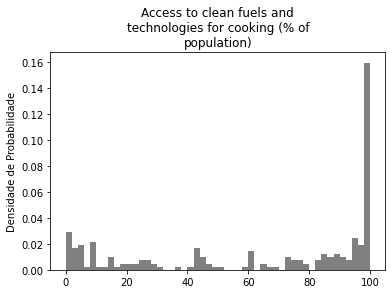

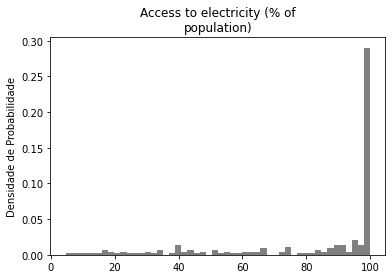

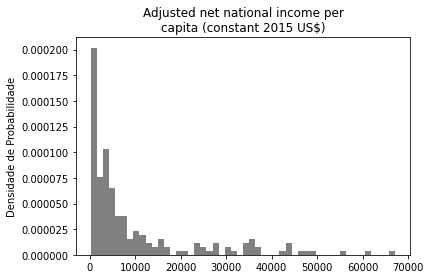

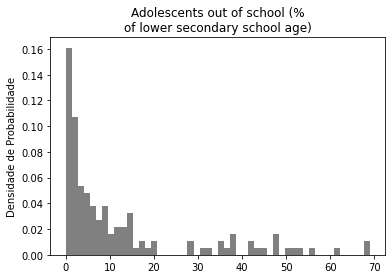

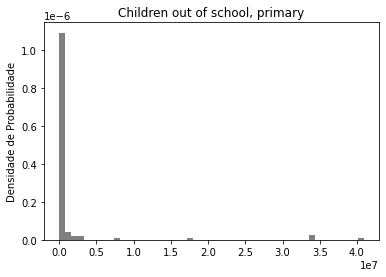

In [121]:
for i in df_2015n.columns:
  if i == 'País':
    pass
  else:
    fig, ax = plt.subplots()
    ax.hist(df_2015n[i], bins=50, density=True, color='gray',histtype = 'bar')

    ax.set_title(formatar_titulo(i))
    ax.set_ylabel('Densidade de Probabilidade')
    # ax.set_xlabel('Preço')
    fig.savefig(bd_geral + "Imagens/histograma_indicador_" + i + ".png", dpi=300)  

### DISPERSÃO XY (DISPERSÃO DE PARES):

In [122]:
df_2015n.columns

Index(['País',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'Adolescents out of school (% of lower secondary school age)',
       'Children out of school, primary'],
      dtype='object')

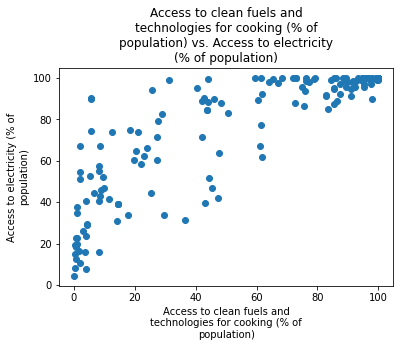

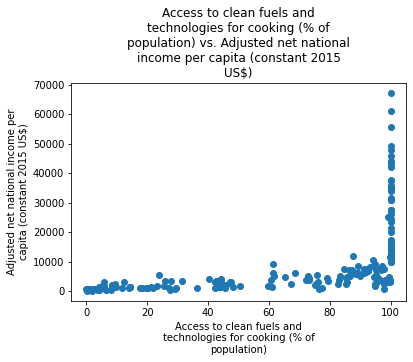

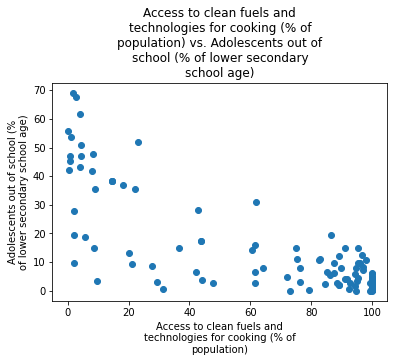

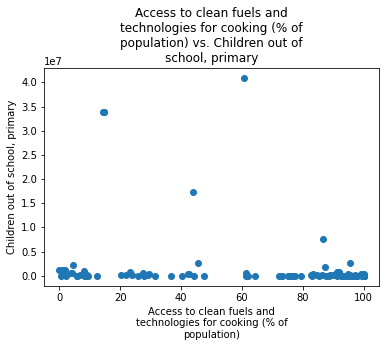

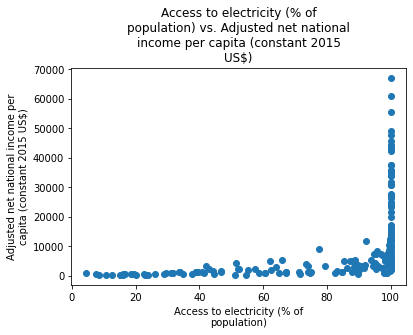

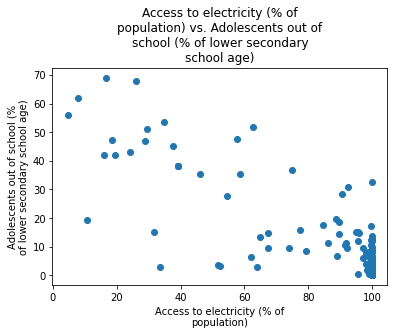

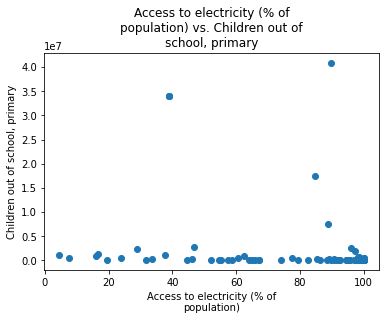

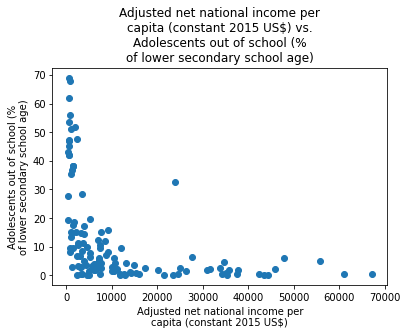

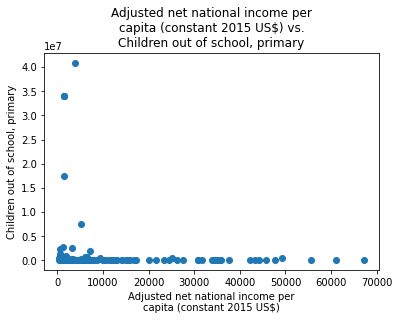

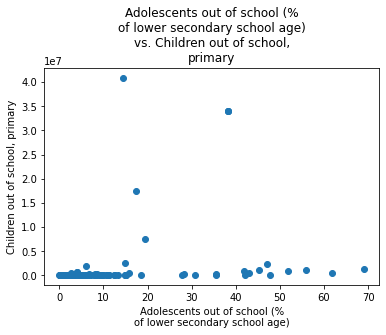

In [123]:
# PARES:
lista_pares = [['Access to clean fuels and technologies for cooking (% of population)','Access to electricity (% of population)'],
                 ['Access to clean fuels and technologies for cooking (% of population)','Adjusted net national income per capita (constant 2015 US$)'],
                 ['Access to clean fuels and technologies for cooking (% of population)','Adolescents out of school (% of lower secondary school age)'],
                 ['Access to clean fuels and technologies for cooking (% of population)','Children out of school, primary'],

                 ['Access to electricity (% of population)','Adjusted net national income per capita (constant 2015 US$)'],
                 ['Access to electricity (% of population)','Adolescents out of school (% of lower secondary school age)'],
                 ['Access to electricity (% of population)','Children out of school, primary'],

                 ['Adjusted net national income per capita (constant 2015 US$)','Adolescents out of school (% of lower secondary school age)'],
                 ['Adjusted net national income per capita (constant 2015 US$)','Children out of school, primary'],
               
                 ['Adolescents out of school (% of lower secondary school age)','Children out of school, primary']]

# SCATTER PLOT:
for n in lista_pares: 

  # make the data
  x = df_2015n[n[0]]
  y = df_2015n[n[1]]

  

  # plot
  fig, ax = plt.subplots()

  ax.scatter(x, y)
  ax.set_title(formatar_titulo( n[0] + ' vs. ' + n[1]) )
  ax.set_ylabel(formatar_titulo(n[1]))
  ax.set_xlabel(formatar_titulo(n[0]))
  
  plt.show()

### CLUSTERIZAÇÃO:

#### NORMALIZANDO OS DADOS:

In [124]:
df_2015n_normal = normalize(df_2015n)
df_2015n_normal

,País,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted net national income per capita (constant 2015 US$),Adolescents out of school (% of lower secondary school age),"Children out of school, primary"
0,Afghanistan,0.274000,0.701254,0.004749,NaN,NaN
1,Albania,0.762000,0.999790,0.045811,0.044197,0.000096
2,Algeria,0.995000,0.991474,0.046374,NaN,0.000567
3,American Samoa,NaN,NaN,NaN,NaN,NaN
4,Andorra,1.000000,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...
229,South Asia,0.438833,0.838666,0.017521,NaN,NaN
230,South Asia (IDA & IBRD),0.438833,0.838666,0.017521,0.252451,0.425190
231,Sub-Saharan Africa,0.144883,0.361351,0.017674,0.555313,0.829834
232,Sub-Saharan Africa (excluding high income),0.144802,0.361291,0.017659,0.555343,0.829832


#### REMOVENDO NaN:

In [129]:
for n in df_2015n_normal.columns:
  df_2015n_normal = df_2015n_normal[df_2015n_normal[n].notna()] # remove NaN na coluna "indicador"
df_2015n_normal = df_2015n_normal.reset_index()

#### MATRIZ DE DISSIMILARIDADE:


In [130]:
col = len(df_2015n_normal)

# inicializando matriz:
df_diss_2015 = pd.DataFrame(np.zeros((col, col)))
# df_diss_2015

In [131]:
# Utilizando a distancia euclidiana entre objetos:

for i in range(0, col):
  for j in range(0, col):
    if (df_diss_2015[i][j] != 0):
      pass
    else:
      contador = 0
      for n in df_2015n_normal.columns:
        if n == 'País':
          pass
        else:  
          contador = contador + (df_2015n_normal[n][i] - df_2015n_normal[n][j])**2
      dist_euclid = contador**0.5
      df_diss_2015[i][j] = dist_euclid
      df_diss_2015[j][i] = dist_euclid

In [132]:
df_diss_2015

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0.000000,6.088729,9.242991,10.454311,11.706778,13.931996,16.158076,17.465847,18.795340,20.125252,...,242.266711,243.583704,244.902168,246.223604,247.542500,248.863657,251.098298,252.423729,253.747392,255.072027
1,6.088729,0.000000,3.199401,4.486624,5.833674,8.062742,10.295699,11.662350,13.042618,14.424757,...,236.372674,237.693141,239.014786,240.339800,241.662148,242.986114,245.221536,246.550489,247.877276,249.205023
2,9.242991,3.199401,0.000000,1.420094,2.893809,5.016296,7.225182,8.622382,10.001267,11.420508,...,233.225391,234.547079,235.869517,237.195225,238.518254,239.842717,242.078488,243.408182,244.735660,246.064104
3,10.454311,4.486624,1.420094,0.000000,1.494417,3.616126,5.839966,7.225897,8.602378,10.014159,...,231.905209,233.225651,234.546967,235.871635,237.193620,238.517089,240.752645,242.081327,243.407825,244.735304
4,11.706778,5.833674,2.893809,1.494417,0.000000,2.247169,4.476361,5.832755,7.225320,8.603767,...,230.586442,231.905185,233.225238,234.548804,235.869697,237.192300,239.427425,240.754921,242.080425,243.406927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,248.863657,242.986114,239.842717,238.517089,237.192300,234.957989,232.723558,231.400638,230.079066,228.757688,...,7.091616,5.668514,4.261791,2.999736,1.460774,0.000000,2.284977,3.764451,5.115783,6.493927
103,251.098298,245.221536,242.078488,240.752645,239.427425,237.193224,234.958747,233.635570,232.314019,230.992095,...,9.256151,7.834863,6.435274,5.036274,3.637017,2.284977,0.000000,1.603028,2.927425,4.309257
104,252.423729,246.550489,243.408182,242.081327,240.754921,238.520764,236.286168,234.961966,233.639322,232.315772,...,10.732745,9.313624,7.919198,6.453145,5.106005,3.764451,1.603028,0.000000,1.414214,2.828427
105,253.747392,247.877276,244.735660,243.407825,242.080425,239.846107,237.611349,236.286110,234.962408,233.637793,...,12.132274,10.711854,9.312031,7.851321,6.486246,5.115783,2.927425,1.414214,0.000000,1.414214


#### Método de Clusterização K-Means:

In [133]:
# coluna para identificar cluster
df_2015n_normal['Cluster'] = -1

In [134]:
# definição do numero de clusters:
k = 3

In [135]:
# encontrando os centróides iniciais (index deles):
init_points = []
for i in range(0, k):
  init_points.append(i)

In [136]:
(init_points)

[0, 1, 2]

In [137]:
for n in df_2015n_normal.index:
  min = df_diss_2015[0,n]
  cluster_code = 0

  for h in init_points:
    if df_diss_2015[h,n] < min:
      min = df_diss_2015[h,n] 
      cluster_code = h
    else:
      pass
  df_2015n_normal['Cluster'][n] = cluster_code

KeyError: ignored

In [138]:
df_2015n_normal

,level_0,index,País,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted net national income per capita (constant 2015 US$),Adolescents out of school (% of lower secondary school age),"Children out of school, primary",Cluster
0,0,1,Albania,0.762000,0.999790,0.045811,0.044197,0.000096,-1
1,1,7,Argentina,0.997000,0.996073,0.171834,0.005441,0.000059,-1
2,2,10,Australia,1.000000,1.000000,0.657767,0.002345,0.000045,-1
3,3,11,Austria,1.000000,1.000000,0.531333,0.028428,0.000037,-1
4,4,12,Azerbaijan,0.959000,1.000000,0.063624,0.141782,0.000146,-1
...,...,...,...,...,...,...,...,...,...
102,102,228,Small states,0.614532,0.764276,0.135209,0.229277,0.012484,-1
103,103,230,South Asia (IDA & IBRD),0.438833,0.838666,0.017521,0.252451,0.425190,-1
104,104,231,Sub-Saharan Africa,0.144883,0.361351,0.017674,0.555313,0.829834,-1
105,105,232,Sub-Saharan Africa (excluding high income),0.144802,0.361291,0.017659,0.555343,0.829832,-1


In [ ]:
#  LIMITE DE EXECUÇÃO ATUAL DO SCRIPT !!!!!!!!!!!!!!!!!!!!!!!!

pdb.set_trace()
clear_output()

###############################

##**RESULTADOS**

###**GERAÇÃO DE GRÁFICOS**


###**GERAÇÃO DE TABELAS**

In [ ]:
df_resumo

In [ ]:
df_resumo.to_excel(bd_geral + "Planilhas/resumo.xlsx")  

## **FINALIZAÇÃO DO SCRIPT**

In [ ]:
# Cronometra o tempo de execução do programa

end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))